In [1]:
from sklearn.metrics.pairwise import pairwise_kernels, pairwise_distances
import matplotlib.pyplot as plt
import vectorbt as vbt
import numpy as np
import pandas as pd

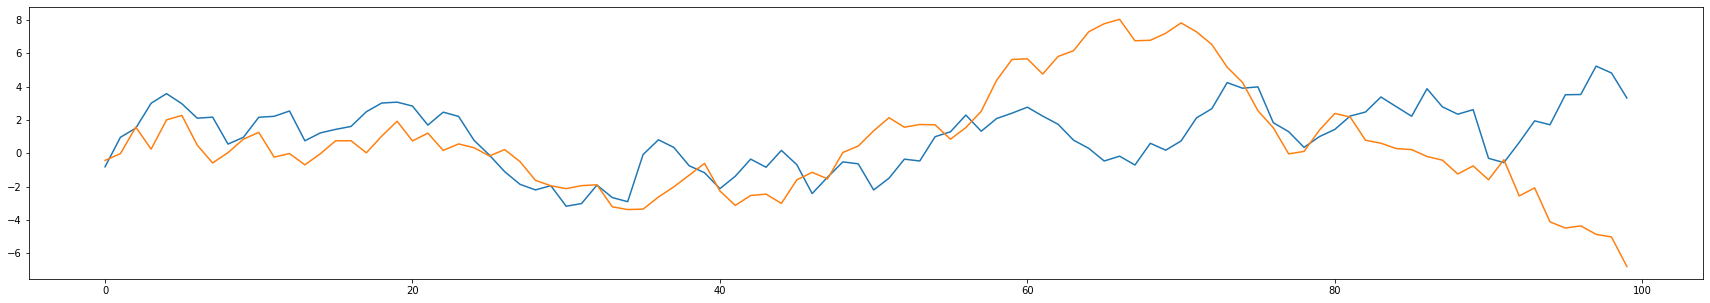

In [2]:
# generate a random walk price series
def generate_random_walk(n: int = 100) -> np.ndarray:
    """
    Generate a random walk of length n.
    """
    x = np.random.randn(n)
    return np.cumsum(x)

crypto_currency_period_1            = generate_random_walk(100)
crypto_currency_period_2            = generate_random_walk(100)
plt.figure(figsize=(30, 5))
plt.plot(crypto_currency_period_1)
plt.plot(crypto_currency_period_2)
plt.show()



In [3]:
start   = '2022-01-01'
end     = '2023-01-01'
interval = '1h'
crypto_currency_period_1 =  vbt.BinanceData.download('BTCUSDT', interval=interval, start=start, end=end).get()
crypto_currency_period_2 =  vbt.BinanceData.download('ETHUSDT', interval=interval, start=start, end=end).get()


/home/serg/miniconda3/envs/tf/lib/python3.10/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)


0it [00:00, ?it/s]

/home/serg/miniconda3/envs/tf/lib/python3.10/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)


0it [00:00, ?it/s]

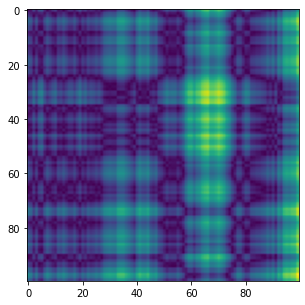

In [9]:
manhattan =  pairwise_distances(crypto_currency_period_1.reshape(-1, 1), crypto_currency_period_2.reshape(-1, 1), metric='manhattan')
plt.figure(figsize=(30, 5))
plt.imshow(manhattan)
plt.show()

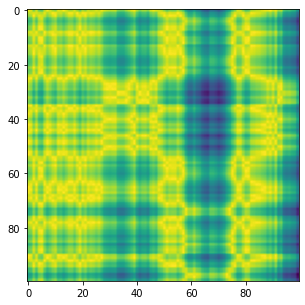

(100, 100)


In [13]:
manhattan_similarity = 1 - manhattan / manhattan.max()
plt.figure(figsize=(30, 5))
plt.imshow(manhattan_similarity)
plt.show()
print(manhattan_similarity.shape)


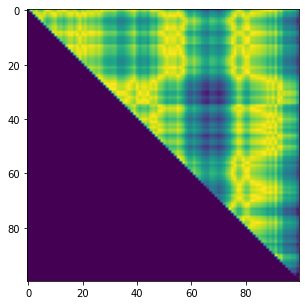

[[0.         0.93429042 0.80192357 ... 0.66285475 0.64986673 0.5026776 ]
 [0.         0.         0.94924877 ... 0.51552955 0.50254153 0.3553524 ]
 [0.         0.         0.         ... 0.46973395 0.45674594 0.3095568 ]
 ...
 [0.         0.         0.         ... 0.         0.14718913 0.        ]
 [0.         0.         0.         ... 0.         0.         0.03437381]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [14]:
manhattan_similarity_tr = np.triu(manhattan_similarity, k=1)
plt.figure(figsize=(30, 5))
plt.imshow(manhattan_similarity_tr)
plt.show()

print(manhattan_similarity_tr)

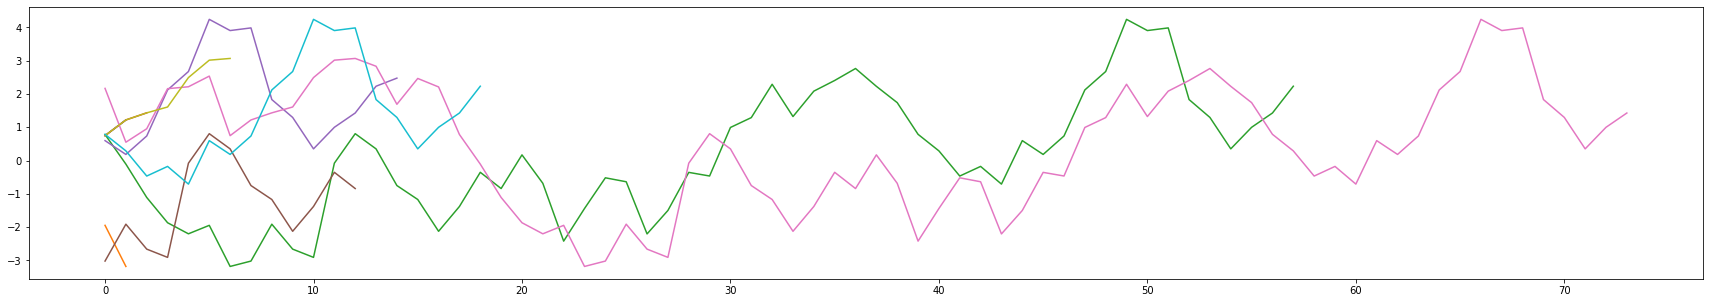

In [18]:
# comvert manhattan_similarity_tr to a labeled dataframe
df = pd.DataFrame(manhattan_similarity_tr)
df = df.stack().reset_index()
df.columns = ['x', 'y', 'value']
df = df[df['value'] > 0]
df = df.sort_values(by='value', ascending=False)
df = df.reset_index(drop=True)
df.head(10)

# plot the top 10 similar patterns
plt.figure(figsize=(30, 5))
df_top_10 = df.head(10)
for i in range(10):
    plt.plot(crypto_currency_period_1[df_top_10['x'][i]:df_top_10['y'][i]])
plt.show()


In [46]:
# label if the price series is a pattern
def label_pattern(price_series: np.ndarray) -> int:
    """
    Label if the price series is a pattern.
    """
    if np.sum(pairwise_distances(price_series.reshape(-1, 1), price_series.reshape(-1, 1), metric='manhattan')) < 100:
        return 1
    else:
        return 0

# generate a random walk price series
def generate_random_walk(n: int = 100) -> np.ndarray:
    """
    Generate a random walk of length n.
    """
    x = np.random.randn(n)
    return np.cumsum(x)

# loop through 1000 random walks and label if they are a pattern
def generate_random_walks(n: int = 1000) -> pd.DataFrame:
    """
    Generate a random walk of length n.
    """
    df = pd.DataFrame()
    for i in range(n):
        df[i] = generate_random_walk(100)
    df['label'] = df.apply(lambda x: label_pattern(x), axis=1)
    return df

df = generate_random_walks(1000)
df.head()

/tmp/ipykernel_15603/2878089707.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = generate_random_walk(100)
/tmp/ipykernel_15603/2878089707.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = generate_random_walk(100)
/tmp/ipykernel_15603/2878089707.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfr

AttributeError: 'Series' object has no attribute 'reshape'